In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import numpy as np
import pandas as pd
from shapely.geometry import Point

govdata = pd.read_csv('FindTreatmentData.csv')
    
df = pd.DataFrame(govdata)


/var/folders/87/7ynwhrz96_bgx9_z5y53stwm0000gp/T/ipykernel_22657/362268701.py:8: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  govdata = pd.read_csv('FindTreatmentData.csv')


In [25]:
ca_df = df.loc[df['state'] == 'CA']

In [39]:
geometry = [Point(xy) for xy in zip(ca_df['longitude'], ca_df['latitude'])]

798

In [27]:
geo_df = gpd.GeoDataFrame(geometry = geometry)

In [28]:
geo_df['geometry'] = geo_df['geometry'][geo_df['geometry'].x < -110]

In [29]:
import geopandas as gpd
from pyproj import Transformer
import matplotlib.pyplot as plt

geojson_path = 'CA_zip_codes.geojson'

gdf = gpd.read_file(geojson_path)

gdf = gdf.set_geometry('geometry')

transformer = Transformer.from_crs(gdf.crs, "EPSG:4326", always_xy=True)

gdf = gdf.to_crs("EPSG:4326")

gdf["latitude"] = gdf["geometry"].apply(lambda geom: geom.centroid.y)
gdf["longitude"] = gdf["geometry"].apply(lambda geom: geom.centroid.x)

#fig, ax = plt.subplots(figsize=(10, 10))
#gdf.plot(ax=ax, edgecolor='black', linewidth=0.5)
#plt.title("GeoJSON File with Lat/Lon Coordinates")
#plt.xlabel("Longitude")
##plt.ylabel("Latitude")
#plt.show()

<Axes: >

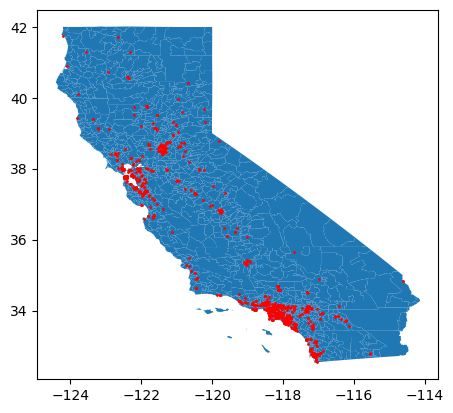

In [30]:
geo_df.plot(ax=gdf.plot(),marker='o', color='red', markersize=1) #plot mental health services